<a href="https://colab.research.google.com/github/DionKimmm/2019SummerML/blob/master/Day19_03_mnist_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Network를 이용한 MNIST Classification

#MNIST 손글씨 인식하기
* 미국 국립표준기술원(NIST)에서 고등학생과 인구조사국 직원 등이 쓴 손글씨를 수집하여 만든 70,000개의 숫자 손글씨 데이터셋

![대체 텍스트](https://snowdeer.github.io/assets/machine-learning/024.png)

* 총 70000개의 데이터 
* 학습용데이터 60000
* 테스트용 데이터 10000
* 손글씨 한 장의 이미지는 28 x 28 = 784개의 픽셀로 구성

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import tensorflow as tf
import random
from matplotlib import pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W0722 10:31:47.118159 140166609250176 deprecation.py:323] From <ipython-input-3-8bf8ae5a5303>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0722 10:31:47.120872 140166609250176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0722 10:31:47.131731 140166609250176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0722 10:31:47.730196 140166609250176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0722 10:31:47.733918 140166609250176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0722 10:31:47.994842 140166609250176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

![대체 텍스트](http://drive.google.com/uc?export=view&id=1uPiOpKuoARRWI6fxVG0V6lrXO-I7Uk0C)

In [0]:
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

![대체 텍스트](http://drive.google.com/uc?export=view&id=1mCFXgyWoE7DlnZn-u7PZyEy2SF8gYa39)

In [6]:
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
print(W1)

<tf.Variable 'Variable:0' shape=(3, 3, 1, 32) dtype=float32_ref>


In [7]:
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
print(L1)

Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)


![대체 텍스트](http://drive.google.com/uc?export=view&id=1gSE3PF7gSNH8lQphDwylVkPyPQMv43TJ)

In [8]:
L1 = tf.nn.relu(L1)
print(L1)


Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)


![대체 텍스트](http://drive.google.com/uc?export=view&id=1lnvXdEM-w8fFHYDj5Gswj-_jT_I56iNW)

In [9]:
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L1)

Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


![대체 텍스트](http://drive.google.com/uc?export=view&id=1FjkbF8Ut7mMUODua1PYIVAnAOBhLEP6G)

?, 14, 14, 32

In [10]:
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
print(W2)

<tf.Variable 'Variable_1:0' shape=(3, 3, 32, 64) dtype=float32_ref>


In [11]:
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
print(L2)

Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)


![대체 텍스트](http://drive.google.com/uc?export=view&id=1HcNyNsVYODy3Q2DKxa2PVI634042jgax)

In [12]:
L2 = tf.nn.relu(L2)
print(L2)

Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)


![대체 텍스트](http://drive.google.com/uc?export=view&id=1QZ0jqVDKVWlYA0_zLKxPj4AsxdrjQmct)

In [13]:
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L2)

Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


![대체 텍스트](http://drive.google.com/uc?export=view&id=1MyUWJCtsIvr8rYtFBpcyyEZZ_xOzm1WR)

In [14]:
L2 = tf.reshape(L2, [-1, 7 * 7 * 64])
print(L2)
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])

Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)


?, 3136

In [0]:
#  Final FC 7x7x64 inputs -> 10 outputs
W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 10], stddev=0.01))
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

In [16]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

W0722 10:31:48.581260 140166609250176 deprecation.py:323] From <ipython-input-16-62cd93d0417e>:2: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [18]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 0001 cost = 0.447729005
Epoch: 0002 cost = 0.106890178
Epoch: 0003 cost = 0.074772903
Epoch: 0004 cost = 0.059662539
Epoch: 0005 cost = 0.049086459
Epoch: 0006 cost = 0.043798481
Epoch: 0007 cost = 0.036839037
Epoch: 0008 cost = 0.032092263
Epoch: 0009 cost = 0.029320808
Epoch: 0010 cost = 0.025311384
Epoch: 0011 cost = 0.022038839
Epoch: 0012 cost = 0.020268124
Epoch: 0013 cost = 0.016448286
Epoch: 0014 cost = 0.015793182
Epoch: 0015 cost = 0.013695969
Learning Finished!


In [19]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))


Accuracy: 0.9867


Label:  [3]
Prediction:  [3]


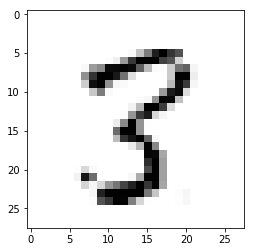

In [20]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()
